# Dhruv Purohit (B00821734)
# Yash Desai (B00810560)

## Assignment-2

## Special Topics in Applied Computer Science (CSCI 5901)

## Import Packages 

In [1]:
import nltk
import pandas as pd
import numpy as np
import re
import string
import seaborn as sbn
import matplotlib.pyplot as plt 

from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Fetching newsgroups data from sklearn

In [2]:
# Fetching newsgroups dataset

newsgroups_categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset='all',categories=newsgroups_categories)

# Question 1

## Cleaning Data

It was observed that data contained numbers, punctuations and some special characters that might affect the accuracy in the model. Moreover, the data contained 'x+' characters which were also removed during the cleaning process. Further cleaning process was carried in the program below as per the requirements.

In [3]:
# Remove Numbers, Punctuation and Special Characters using regular expression

pattern='[\W\d_]'
result = [re.sub(pattern, ' ', word.lower()) for word in newsgroups.data] 

In [4]:
# Removes x+ characters 

result_1 = [re.sub('x+', '', word) for word in result] 

# Question 1(a)

## Word Tokenization after cleaning process 

In [5]:
# Word Tokenization

nltk.download('punkt')
result_word_tokenized=[]
for word in result_1:
    result_word_tokenized.append(word_tokenize(word))
print(result_word_tokenized[0])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ykd10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['from', 'healta', 'saturn', 'wwc', 'edu', 'tammy', 'r', 'healy', 'subject', 're', 'who', 'are', 'we', 'to', 'judge', 'bobby', 'lines', 'organization', 'walla', 'walla', 'college', 'lines', 'in', 'article', 'apr', 'ultb', 'isc', 'rit', 'edu', 'snm', 'ultb', 'isc', 'rit', 'edu', 's', 'n', 'mozumder', 'writes', 'from', 'snm', 'ultb', 'isc', 'rit', 'edu', 's', 'n', 'mozumder', 'subject', 're', 'who', 'are', 'we', 'to', 'judge', 'bobby', 'date', 'wed', 'apr', 'gmt', 'in', 'article', 'healta', 'saturn', 'wwc', 'edu', 'healta', 'saturn', 'wwc', 'edu', 'tammy', 'r', 'healy', 'writes', 'bobby', 'i', 'would', 'like', 'to', 'take', 'the', 'liberty', 'to', 'quote', 'from', 'a', 'christian', 'writer', 'named', 'ellen', 'g', 'white', 'i', 'hope', 'that', 'what', 'she', 'said', 'will', 'help', 'you', 'to', 'edit', 'your', 'remarks', 'in', 'this', 'group', 'in', 'the', 'future', 'do', 'not', 'set', 'yourself', 'as', 'a', 'standard', 'do', 'not', 'make', 'your', 'opinions', 'your', 'views', 'of', 'dut

## Cleaning Data

### Remove characters having length 1 and 2 from the data

In [6]:
# Remove characters having length 1 and 2

result_remove_unnecessary_words=[]
result_filtered_words=[]
temp_filtered_words=[]

for sublist in result_word_tokenized:
    for word in sublist:
        if len(word) <=2:
            result_remove_unnecessary_words.append(word)
        else:
            temp_filtered_words.append(word)
    result_filtered_words.append(temp_filtered_words)
    temp_filtered_words=[]

### Remove English Stop Words using Stop Words dictionary provided by nltk

In [7]:
# Remove stop words

nltk.download('stopwords')
stop_words=set(stopwords.words("english"))

result_remove_stop_words=[]
temp_stop_words=[]
for sublist in result_filtered_words:
    for word in sublist:
        if word not in stop_words:
            temp_stop_words.append(word)
    result_remove_stop_words.append(temp_stop_words)
    temp_stop_words=[]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ykd10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tagging Part of Speech to each tokenized word of the data

In [ ]:
# Part of Speech Tagging

nltk.download('averaged_perceptron_tagger')
result_word_pos=[]
for word in result_remove_stop_words:
    result_word_pos.append(nltk.pos_tag(word))
print(result_word_pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ykd10\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Question 1(b)

## Perform lemmatization after removing stop words to lemmatize the words to its root.

The reason behind performing lemmetization instead of stemming on the data is that stemming removes just the prefix and suffix from the word without considering the actual meaning of the word.

Lemmetization will also remove both the prefix and suffix in a way that the word still remains meaningful.
Hence, lemmetization was prefered to be performed on the data.

In [9]:
# Lemmatization

nltk.download('wordnet')
lemmatization=WordNetLemmatizer()

result_lemmatized_words=[]
temp_lemmatized_words=[]

for sublist in result_remove_stop_words:
    for word in sublist:
        temp_lemmatized_words.append(lemmatization.lemmatize(word))
    result_lemmatized_words.append(temp_lemmatized_words)
    temp_lemmatized_words=[]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ykd10\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Method to filter bigrams as per different POS types

In [10]:
def filterBigrams(ngram):
    type_1=('JJ', 'JJR', 'JJS','NN', 'NNS', 'NNP', 'NNPS')
    type_2=('NN', 'NNS', 'NNP', 'NNPS')
    ngram_tags=nltk.pos_tag(ngram)
    if ngram_tags[0][1] in type_1 and ngram_tags[1][1] in type_2:
        return True
    else:
        return False    

## Initializing Bigrams using nltk's collocation object

In [11]:
# Initializing Bigrams
bigram_flattened_list=[]

for sublist in result_lemmatized_words:
    for word in sublist:
        bigram_flattened_list.append(word)

bigrams=nltk.collocations.BigramAssocMeasures()
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(bigram_flattened_list)
bigramFinder.apply_freq_filter(20)

## Extract Bigrams using Frequency method with filtered POS types

In [12]:
# Bigrams using frequency with filter

bigramFrequency=pd.DataFrame(list(bigramFinder.ngram_fd.items()), columns=['Bigram','Frequency']).sort_values(by='Frequency', ascending=False)
filtered_bigramFrequency=bigramFrequency[bigramFrequency.Bigram.map(lambda word:filterBigrams(word))]
filtered_bigramFrequency[:20]

,Bigram,Frequency
7,"(line, article)",898
8,"(article, apr)",627
138,"(line, nntp)",607
64,"(organization, university)",530
98,"(nasa, gov)",530
69,"(writes, article)",494
30,"(distribution, world)",372
191,"(caltech, edu)",345
63,"(uiuc, edu)",339
153,"(access, dige)",326


## Extract Bigrams using PMI (Pointwise Mutual Information) test method (without filtering)

In [13]:
# Bigramss using PMI test

bigramPMI=pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.pmi)),columns=['Bigram','PMI Score'])
bigramPMI[:20]

,Bigram,PMI Score
0,"(scicom, alphacdc)",14.849390
1,"(televison, repo)",14.849390
2,"(evelyn, conlon)",14.711887
3,"(hatching, odwyer)",14.711887
4,"(odwyer, sse)",14.711887
5,"(spartan, brocku)",14.711887
6,"(mayan, televison)",14.711887
7,"(hen, evelyn)",14.586356
8,"(sse, hen)",14.586356
9,"(notre, dame)",14.470879


## Extract Bigrams using T-Test method with filtered POS types

In [14]:
# Bigrams using t-Test

bigramTTest = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.student_t)), columns=['Bigram','t-Test Score']).sort_values(by='t-Test Score', ascending=False)
filtered_bigram_TTest=bigramFrequency[bigramTTest.Bigram.map(lambda word:filterBigrams(word))]
filtered_bigram_TTest[:20]

c:\users\ykd10\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Bigram,Frequency
23,"(nntp, posting)",1496
24,"(posting, host)",1493
7,"(line, article)",898
8,"(article, apr)",627
138,"(line, nntp)",607
64,"(organization, university)",530
98,"(nasa, gov)",530
69,"(writes, article)",494
30,"(distribution, world)",372
191,"(caltech, edu)",345


## Extract bigrams using Chi-square Test method (without filtering)

In [15]:
# Bigrams using Chi-square Test

bigramChiSquare=pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.chi_sq)), columns=['Bigram','Chi-Square Score']).sort_values(by='Chi-Square Score', ascending=False)
bigramChiSquare[:20]

,Bigram,Chi-Square Score
0,"(solntze, wpd)",590394.000000
8,"(odwyer, sse)",590394.000000
13,"(timmbake, mcl)",590394.000000
12,"(televison, repo)",590394.000000
1,"(alink, ksand)",590394.000000
10,"(scicom, alphacdc)",590394.000000
9,"(quack, kfu)",590394.000000
11,"(spartan, brocku)",590394.000000
7,"(notre, dame)",590394.000000
6,"(mchp, sni)",590394.000000


# Question 1(c)

## Comparing all the techniques to analyze the overlapping between them

In [16]:
bigram_frequency=filtered_bigramFrequency.Bigram.values
bigram_pmi=bigramPMI.Bigram.values
bigram_tTest=filtered_bigram_TTest.Bigram.values
bigram_chisquare=bigramChiSquare.Bigram.values

df_final_bigram_comparison=pd.DataFrame([bigram_frequency,bigram_pmi,bigram_tTest,bigram_chisquare]).T
df_final_bigram_comparison.columns = ['Bigram - Frequency Filter', 'Bigram - PMI', 'Bigram - T-test Filter', 'Bigram - Chi-Sq Test']
df_final_bigram_comparison[:20]

,Bigram - Frequency Filter,Bigram - PMI,Bigram - T-test Filter,Bigram - Chi-Sq Test
0,"(line, article)","(scicom, alphacdc)","(nntp, posting)","(solntze, wpd)"
1,"(article, apr)","(televison, repo)","(posting, host)","(odwyer, sse)"
2,"(line, nntp)","(evelyn, conlon)","(line, article)","(timmbake, mcl)"
3,"(organization, university)","(hatching, odwyer)","(article, apr)","(televison, repo)"
4,"(nasa, gov)","(odwyer, sse)","(line, nntp)","(alink, ksand)"
5,"(writes, article)","(spartan, brocku)","(organization, university)","(scicom, alphacdc)"
6,"(distribution, world)","(mayan, televison)","(nasa, gov)","(quack, kfu)"
7,"(caltech, edu)","(hen, evelyn)","(writes, article)","(spartan, brocku)"
8,"(uiuc, edu)","(sse, hen)","(distribution, world)","(notre, dame)"
9,"(access, dige)","(notre, dame)","(caltech, edu)","(mchp, sni)"


In [17]:
df_frequency_tTest=df_final_bigram_comparison["Bigram - Frequency Filter"].isin(df_final_bigram_comparison["Bigram - T-test Filter"])
df_frequency_tTest[:20]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14    False
15     True
16     True
17     True
18     True
19     True
Name: Bigram - Frequency Filter, dtype: bool

In [18]:
df_PMI_chi=df_final_bigram_comparison["Bigram - PMI"].isin(df_final_bigram_comparison["Bigram - Chi-Sq Test"])
df_PMI_chi[:20]

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: Bigram - PMI, dtype: bool

## Results of Question 1(c)

### Check overlapping of the results among the four techniques 

After fetching the bi-grams using four techniques i.e. Frequency (with filter), PMI Test (without filter), t-Test (with filter) and Chi-square test (without filter), all the bi-grams were combined to analyze the overlapping among the techniques.

It was observed from the above results, that frequency and t-Test methods are quite similar. After comparing the 20 results of two previously mentioned mehtods using isin() method, it was observed that 18 out of 20 results were overlapping. 

On the other hand PMI and chi-square gives better results as all the values (top 20 results) are overlapping with each other even without applying any filtering.

# Question 2

# Question 2(a)

## Cleaning Data

### Removed Numbers, Punctuations and Special Characters using Regex from the raw data

The punctuations and some special characters were removed using Regex. Moreover, the data contained 'x+' characters which were also removed during the cleaning process.

In [19]:
pattern='[^A-Za-z]'
result_q2= [re.sub(pattern, ' ', word.lower()) for word in newsgroups.data] 
result_q2[0]

'from  healta saturn wwc edu  tammy r healy  subject  re  who are we to judge  bobby  lines     organization  walla walla college lines      in article      apr                ultb isc rit edu  snm     ultb isc rit edu  s n  mozumder   writes   from  snm     ultb isc rit edu  s n  mozumder    subject  re  who are we to judge  bobby   date  wed     apr               gmt  in article  healta              saturn wwc edu  healta saturn wwc edu  tammy r healy  writes    bobby       i would like to take the liberty to quote from a christian writer named    ellen g  white   i hope that what she said will help you to edit your    remarks in this group in the future        do not set yourself as a standard   do not make your opinions  your views    of duty  your interpretations of scripture  a criterion for others and in    your heart condemn them if they do not come up to your ideal                              thoughts fromthe mount of blessing p           i hope quoting this doesn t make the 

In [20]:
result_1_q2=[re.sub('x+', '', word) for word in result_q2] 
result_1_q2[0]

'from  healta saturn wwc edu  tammy r healy  subject  re  who are we to judge  bobby  lines     organization  walla walla college lines      in article      apr                ultb isc rit edu  snm     ultb isc rit edu  s n  mozumder   writes   from  snm     ultb isc rit edu  s n  mozumder    subject  re  who are we to judge  bobby   date  wed     apr               gmt  in article  healta              saturn wwc edu  healta saturn wwc edu  tammy r healy  writes    bobby       i would like to take the liberty to quote from a christian writer named    ellen g  white   i hope that what she said will help you to edit your    remarks in this group in the future        do not set yourself as a standard   do not make your opinions  your views    of duty  your interpretations of scripture  a criterion for others and in    your heart condemn them if they do not come up to your ideal                              thoughts fromthe mount of blessing p           i hope quoting this doesn t make the 

## Word Tokenization after cleaning process  

In [21]:
nltk.download('punkt')

result_word_tokenized_2=[]
for word in result_1_q2:
    result_word_tokenized_2.append(word_tokenize(word))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ykd10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Remove English Stop Words using Stop Words dictionary provided by nltk

In [22]:
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))

result_remove_stop_words_2=[]
temp_stop_words_2=[]

for sublist in result_word_tokenized_2:
    for word in sublist:
        if word not in stop_words:
            temp_stop_words_2.append(word)
    result_remove_stop_words_2.append(temp_stop_words_2)
    temp_stop_words_2=[]
result_remove_stop_words_2[0]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ykd10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['healta',
 'saturn',
 'wwc',
 'edu',
 'tammy',
 'r',
 'healy',
 'subject',
 'judge',
 'bobby',
 'lines',
 'organization',
 'walla',
 'walla',
 'college',
 'lines',
 'article',
 'apr',
 'ultb',
 'isc',
 'rit',
 'edu',
 'snm',
 'ultb',
 'isc',
 'rit',
 'edu',
 'n',
 'mozumder',
 'writes',
 'snm',
 'ultb',
 'isc',
 'rit',
 'edu',
 'n',
 'mozumder',
 'subject',
 'judge',
 'bobby',
 'date',
 'wed',
 'apr',
 'gmt',
 'article',
 'healta',
 'saturn',
 'wwc',
 'edu',
 'healta',
 'saturn',
 'wwc',
 'edu',
 'tammy',
 'r',
 'healy',
 'writes',
 'bobby',
 'would',
 'like',
 'take',
 'liberty',
 'quote',
 'christian',
 'writer',
 'named',
 'ellen',
 'g',
 'white',
 'hope',
 'said',
 'help',
 'edit',
 'remarks',
 'group',
 'future',
 'set',
 'standard',
 'make',
 'opinions',
 'views',
 'duty',
 'interpretations',
 'scripture',
 'criterion',
 'others',
 'heart',
 'condemn',
 'come',
 'ideal',
 'thoughts',
 'fromthe',
 'mount',
 'blessing',
 'p',
 'hope',
 'quoting',
 'make',
 'atheists',
 'gag',
 'th

## Perform stemming on words after removing stop words

In [23]:
# Stemming after removing stop words

porterStemmer = PorterStemmer()

result_stemmed_words_2=[]
temp_stemmed_words_2=[]

for sublist in result_remove_stop_words_2:
    for word in sublist:
        temp_stemmed_words_2.append(porterStemmer.stem(word))
    result_stemmed_words_2.append(temp_stemmed_words_2)
    temp_stemmed_words_2=[]
result_stemmed_words_2[0]

['healta',
 'saturn',
 'wwc',
 'edu',
 'tammi',
 'r',
 'heali',
 'subject',
 'judg',
 'bobbi',
 'line',
 'organ',
 'walla',
 'walla',
 'colleg',
 'line',
 'articl',
 'apr',
 'ultb',
 'isc',
 'rit',
 'edu',
 'snm',
 'ultb',
 'isc',
 'rit',
 'edu',
 'n',
 'mozumd',
 'write',
 'snm',
 'ultb',
 'isc',
 'rit',
 'edu',
 'n',
 'mozumd',
 'subject',
 'judg',
 'bobbi',
 'date',
 'wed',
 'apr',
 'gmt',
 'articl',
 'healta',
 'saturn',
 'wwc',
 'edu',
 'healta',
 'saturn',
 'wwc',
 'edu',
 'tammi',
 'r',
 'heali',
 'write',
 'bobbi',
 'would',
 'like',
 'take',
 'liberti',
 'quot',
 'christian',
 'writer',
 'name',
 'ellen',
 'g',
 'white',
 'hope',
 'said',
 'help',
 'edit',
 'remark',
 'group',
 'futur',
 'set',
 'standard',
 'make',
 'opinion',
 'view',
 'duti',
 'interpret',
 'scriptur',
 'criterion',
 'other',
 'heart',
 'condemn',
 'come',
 'ideal',
 'thought',
 'fromth',
 'mount',
 'bless',
 'p',
 'hope',
 'quot',
 'make',
 'atheist',
 'gag',
 'think',
 'ellen',
 'white',
 'put',
 'better'

# Question 2(b) - Feature Extraction

## Initialize Tf-idf vector object for feature extraction and convert it into vectors for modelling

In [24]:
# Flattened the list of list for feature extraction
vector_list=[' '.join(sublist) for sublist in result_stemmed_words_2]

# Feature Extraction
newsgroups_vectorizer=TfidfVectorizer()
newsgroups_vectors=newsgroups_vectorizer.fit_transform(vector_list)

# Question 2(c)

## Split the data into train (70%) and test (30%) dataset

Here, the training data is the vectors obtained from feature extraction and the test data is "newsgroups.target".

In [25]:
X=newsgroups_vectors
y=newsgroups.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=30)

## Train the model using Multinomial NB algorithm which is used for classifying discrete features

### Results

An accuracy of 94.99% has been resulted using Multinomial NB

In [26]:
# Multinomial NB

multinomialNB=MultinomialNB(alpha=.01)
multinomialNB.fit(X_train,y_train)
predict_multinomialNB=multinomialNB.predict(X_test)
print("Accuracy using MultinomialNB: " + "{:.2%}".format(metrics.accuracy_score(y_test,predict_multinomialNB)))

Accuracy using MultinomialNB: 94.99%


## Confusion Matrix for the above result obtained using Multinomial NB showing confusion between classes.

In [27]:
# Confusion Matrix for Multinomial NB

cnfmatrix_multinomialNB=confusion_matrix(y_test,predict_multinomialNB)
print(cnfmatrix_multinomialNB)

[[221   0   0  17]
 [  1 283   6   2]
 [  1   5 293   3]
 [ 15   1   0 169]]


## Plotting Confusion Matrix (Multinomial NB)

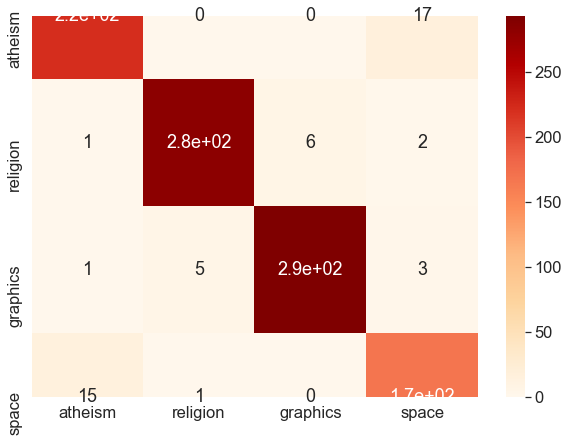

In [28]:
# Plot confusion matrix for Multinomial NB

df_cnfmatrix_multinomialNB=pd.DataFrame(cnfmatrix_multinomialNB, index=['atheism','religion','graphics','space'], 
                                        columns=['atheism','religion','graphics','space'])
plt.figure(figsize=(10,7))
sbn.set(font_scale=1.5)
sbn.heatmap(df_cnfmatrix_multinomialNB, cmap="OrRd", annot=True,xticklabels=True, yticklabels=True)

## SVM

## Train the model using Support Vector Machine (SVM) Classifier

### Results 

An accuracy of 95.77% has been resulted using Multinomial NB

In [29]:
# Linear Kernel

svcClassifier=SVC(kernel='linear', C=1, gamma=2, random_state=45)
svcClassifier.fit(X_train,y_train)
predict_svcClassifier=svcClassifier.predict(X_test)
print("Accuracy using SVM Classifier - Linear Kernel: " + "{:.2%}".format(metrics.accuracy_score(y_test,predict_svcClassifier)))

Accuracy using SVM Classifier - Linear Kernel: 95.77%


## Confusion matrix for the above result obtained using SVM (Linear Kernel) showing confusion between classes.

In [30]:
# Confusion Matrix for SVM - Linear

cnfmatrix_svcClassifier=confusion_matrix(y_test,predict_svcClassifier)
print(cnfmatrix_svcClassifier)

[[219   3   1  15]
 [  0 289   3   0]
 [  1   6 293   2]
 [ 10   2   0 173]]


## Confusion Matrix for SVM - Linear

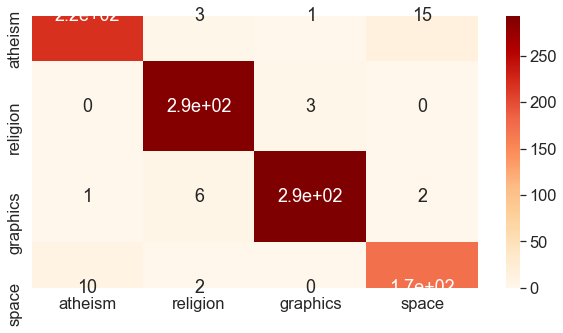

In [31]:
# Plot confusion matrix for SVM - Linear

df_cnfmatrix_svcClassifier=pd.DataFrame(cnfmatrix_svcClassifier, index=['atheism','religion','graphics','space'], 
                                        columns=['atheism','religion','graphics','space'])
plt.figure(figsize=(10,5))
sbn.set(font_scale=1.5)
sbn.heatmap(df_cnfmatrix_svcClassifier, cmap="OrRd", annot=True)

## Changing kernel 

By changing kernel to Polynomial and RBF, we can analyze that the accuracy gradually decreases to 82.10% and 92.72% using Polynomial and RBF kernel respectively.

Moreover, the confusion between the classes also gradually decreases for both the kernels as shown below.

## SVM - Polynomial Kernel

In [32]:
# Polynomial Kernel

svcClassifier_polynomial=SVC(kernel='poly',C=1, gamma=2, random_state=45)
svcClassifier_polynomial.fit(X_train,y_train)
predict_svcClassifier_polynomial=svcClassifier_polynomial.predict(X_test)
print("Accuracy using SVM Classifier - Polynomial Kernel: "+"{:.2%}".format(metrics.accuracy_score(y_test,predict_svcClassifier_polynomial)))

Accuracy using SVM Classifier - Polynomial Kernel: 82.10%


In [33]:
# Confusion Matrix for SVM - Polynomial

cnfmatrix_svcClassifier_polynomial=confusion_matrix(y_test,predict_svcClassifier_polynomial)
print(cnfmatrix_svcClassifier_polynomial)

[[179  52   0   7]
 [  0 290   2   0]
 [  1  53 248   0]
 [  9  57   1 118]]


## SVM - RBF Kernel

In [34]:
# RBF Kernel

svcClassifier_rbf=SVC(kernel='rbf', C=1, gamma=2, random_state=45)
svcClassifier_rbf.fit(X_train,y_train)
predict_svcClassifier_rbf=svcClassifier_rbf.predict(X_test)
print("Accuracy using SVC Classifier - RBF Kernel: "+"{:.2%}".format(metrics.accuracy_score(y_test,predict_svcClassifier_rbf)))

Accuracy using SVC Classifier - RBF Kernel: 92.72%


In [35]:
# Confusion Matrix for SVM - RBF

cnfmatrix_svcClassifier_rbf=confusion_matrix(y_test,predict_svcClassifier_rbf)
print(cnfmatrix_svcClassifier_rbf)

[[215   9   0  14]
 [  0 289   3   0]
 [  0  15 287   0]
 [ 14  15   4 152]]


# Question 2(d)

## Removed Numbers, Punctuations and Special Characters using Regex from raw data

The punctuations and some special characters were removed using Regex. Moreover, the data contained 'x+' characters which were also removed during the cleaning process.

In [36]:
# Remove Numbers, Punctuation and Special Characters from Raw Data

pattern='[\W\d_]'
result_raw=[re.sub(pattern, ' ', word.lower()) for word in newsgroups.data] 

In [37]:
# Removes x+ characters from Raw Data

result_1_raw = [re.sub('x+', '', word) for word in result_raw] 

## Word Tokenization of raw data

In [38]:
# Tokenization of Raw data

from nltk.tokenize import word_tokenize
nltk.download('punkt')
result_word_tokenized_raw=[]

for word in result_1_raw:
    result_word_tokenized_raw.append(word_tokenize(word))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ykd10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Remove stop words from the word tokens

In [39]:
# Removing stop words from tokenized raw data 

nltk.download('stopwords')
stop_words=set(stopwords.words("english"))

result_remove_stop_words_raw=[]
temp_stop_words_raw=[]

for sublist in result_word_tokenized_raw:
    for word in sublist:
        if word not in stop_words:
            temp_stop_words_raw.append(word)
    result_remove_stop_words_raw.append(temp_stop_words_raw)
    temp_stop_words_raw=[]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ykd10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Perform stemming on word tokens to obtain root words

In [40]:
# Stemming after removing stop words from raw data

porterStemmer = PorterStemmer()

result_stemmed_words_raw=[]
temp_stemmed_words_raw=[]

for sublist in result_remove_stop_words_raw:
    for word in sublist:
        temp_stemmed_words_raw.append(porterStemmer.stem(word))
    result_stemmed_words_raw.append(temp_stemmed_words_raw)
    temp_stemmed_words_raw=[]

## Tagging Part of Speech on the stemmed word tokens 

In [41]:
# Part of speech tagging on raw data

nltk.download('averaged_perceptron_tagger')

result_word_pos_raw=[]
for word in result_stemmed_words_raw:
        result_word_pos_raw.append(nltk.pos_tag(word))
result_word_pos_raw[0]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ykd10\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('healta', 'NN'),
 ('saturn', 'NN'),
 ('wwc', 'NN'),
 ('edu', 'NN'),
 ('tammi', 'NN'),
 ('r', 'NN'),
 ('heali', 'NN'),
 ('subject', 'JJ'),
 ('judg', 'NN'),
 ('bobbi', 'NN'),
 ('line', 'NN'),
 ('organ', 'IN'),
 ('walla', 'NN'),
 ('walla', 'NN'),
 ('colleg', 'NN'),
 ('line', 'NN'),
 ('articl', 'IN'),
 ('apr', 'JJ'),
 ('ultb', 'JJ'),
 ('isc', 'NN'),
 ('rit', 'NN'),
 ('edu', 'NN'),
 ('snm', 'NN'),
 ('ultb', 'JJ'),
 ('isc', 'NN'),
 ('rit', 'NN'),
 ('edu', 'NN'),
 ('n', 'NN'),
 ('mozumd', 'NN'),
 ('write', 'VBP'),
 ('snm', 'NN'),
 ('ultb', 'JJ'),
 ('isc', 'NN'),
 ('rit', 'NN'),
 ('edu', 'NN'),
 ('n', 'JJ'),
 ('mozumd', 'NN'),
 ('subject', 'JJ'),
 ('judg', 'NN'),
 ('bobbi', 'NN'),
 ('date', 'NN'),
 ('wed', 'VBD'),
 ('apr', 'JJ'),
 ('gmt', 'NN'),
 ('articl', 'NN'),
 ('healta', 'NN'),
 ('saturn', 'VBP'),
 ('wwc', 'JJ'),
 ('edu', 'NN'),
 ('healta', 'NN'),
 ('saturn', 'VBP'),
 ('wwc', 'JJ'),
 ('edu', 'NN'),
 ('tammi', 'NN'),
 ('r', 'NN'),
 ('heali', 'NN'),
 ('write', 'JJ'),
 ('bobbi', 'NN'),
 ('

## Extracting nouns only from the above POS result

In [ ]:
# Extracting nouns only.

result_noun_raw= []
temp_noun_raw=[]
for sublist in result_word_pos_raw:
    for word in sublist:
        if word[1].startswith("NN"):
            temp_noun_raw.append(word[0])
    result_noun_raw.append(temp_noun_raw)
    temp_noun_raw=[]
result_noun_raw[0]  

## Initialize Tf-idf vector object for feature extraction and convert it into vectors using "nouns" only for modelling

In [ ]:
# Flattened the list of list for feature extraction

vector_list_noun=[' '.join(sublist) for sublist in result_noun_raw]

# Feature Extraction

newsgroups_vectorizer_noun=TfidfVectorizer()
newsgroups_vectors_noun=newsgroups_vectorizer_noun.fit_transform(vector_list_noun)

## Split the data into train(70%) and test(30%) dataset

### Here, the training data is the vectors obtained from feature extraction of nouns only and the test data is "newsgroups.target".

In [ ]:
X=newsgroups_vectors_noun
y=newsgroups.target
X_train_noun, X_test_noun, y_train_noun, y_test_noun=train_test_split(X, y, test_size=0.3,random_state=30)

## Multinomial NB

## Train the model using Multinomial NB algorithm on"nouns only data" which is used for classifying discrete features

### Results

We are getting an accuracy of 94.30% using Multinomial NB

In [ ]:
# Multinomial NB on Nouns

multinomialNB_noun=MultinomialNB(alpha=.01)
multinomialNB_noun.fit(X_train_noun,y_train_noun)
predict_multinomialNB_noun=multinomialNB_noun.predict(X_test_noun)
print("Accuracy using MultinomialNB - Nouns: "+"{:.2%}".format(metrics.accuracy_score(y_test_noun,predict_multinomialNB_noun)))

## Confusion Matrix for the above result obtained using Multinomial NB for "nouns only data" showing confusion between classes.

In [ ]:
# Confusion Matrix for Multinomial NB

cnfmatrix_multinomialNB_Noun=confusion_matrix(y_test_noun,predict_multinomialNB_noun)
print(cnfmatrix_multinomialNB_Noun)

## Plotting Confusion Matrix (Multinomial NB)

In [ ]:
# Plot confusion matrix for Multinomial NB - Nouns

df_cnfmatrix_multinomialNB_noun=pd.DataFrame(cnfmatrix_multinomialNB_Noun, index=['atheism','religion','graphics','space'], 
                                        columns=['atheism','religion','graphics','space'])
plt.figure(figsize=(10,7))
sbn.set(font_scale=1.5)
sbn.heatmap(df_cnfmatrix_multinomialNB_noun, cmap="OrRd", annot=True,xticklabels=True, yticklabels=True)

## SVM

## Train the model using Support Vector Machine (SVM) Classifier (Nouns only data)

### Results 

We are getting an accuracy of 96.17% using SVM with Linear Kernel

In [ ]:
# SVM with Linear Kernel

svcClassifier_noun=SVC(kernel='linear', C=1, gamma=2, random_state=45)
svcClassifier_noun.fit(X_train_noun,y_train_noun)
predict_svcClassifier_noun=svcClassifier_noun.predict(X_test_noun)
print("Accuracy using SVM Classifier - Polynomial Kernel - Nouns :"+"{:.2%}".format(metrics.accuracy_score(y_test_noun,predict_svcClassifier_noun)))

## Confusion matrix for the above result obtained using SVM (Linear Kernel) showing confusion between classes.

In [ ]:
# Confusion Matrix for SVM - Linear - Nouns

cnfmatrix_svcClassifier_Noun=confusion_matrix(y_test_noun,predict_svcClassifier_noun)
print(cnfmatrix_svcClassifier_Noun)

## Confusion Matrix for SVM - Linear (Nouns only data)

In [ ]:
# Plot confusion matrix for SVM - Linear- Nouns

df_cnfmatrix_svcClassifier_noun=pd.DataFrame(cnfmatrix_svcClassifier_Noun, index=['atheism','religion','graphics','space'], 
                                        columns=['atheism','religion','graphics','space'])
plt.figure(figsize=(10,5))
sbn.set(font_scale=1.5)
sbn.heatmap(df_cnfmatrix_svcClassifier_noun, cmap="OrRd", annot=True)

## Changing kernel 

## SVM - Polynomial Kernel

In [ ]:
# Polynoimial Kernel

svcClassifier_polynomial_noun=SVC(kernel='poly',degree=3, C=0.1, gamma=2, random_state=45)
svcClassifier_polynomial_noun.fit(X_train_noun,y_train_noun)
predict_svcClassifier_polynomial_noun=svcClassifier_polynomial_noun.predict(X_test_noun)
print("Accuracy using SVM Classifier - Polynomial Kernel - Nouns :"+"{:.2%}".format(metrics.accuracy_score(y_test_noun,predict_svcClassifier_polynomial_noun)))

In [ ]:
# Confusion Matrix for SVM - Polynomial - Nouns

cnfmatrix_svcClassifier_polynomial_noun=confusion_matrix(y_test,predict_svcClassifier_polynomial_noun)
print(cnfmatrix_svcClassifier_polynomial_noun)

## SVM - RBF Kernel

In [ ]:
# RBF Kernel

svcClassifier_rbf_noun=SVC(kernel='rbf', C=1, gamma=2, random_state=45)
svcClassifier_rbf_noun.fit(X_train_noun,y_train_noun)
predict_svcClassifier_rbf_noun=svcClassifier_rbf_noun.predict(X_test_noun)
print("Accuracy using SVM Classifier - RBF Kernel - Nouns :"+"{:.2%}".format(metrics.accuracy_score(y_test_noun,predict_svcClassifier_rbf_noun)))

In [ ]:
# Confusion Matrix for SVM - RBF - Nouns

cnfmatrix_svcClassifier_rbf_noun=confusion_matrix(y_test,predict_svcClassifier_rbf_noun)
print(cnfmatrix_svcClassifier_rbf_noun)

## Result:

Comparing both the results (entire dataset and dataset with "nouns" only), there is no big difference in the accuracy. For "nouns" only data the accuracy is slightly decreasing for "Multinomial NB", "SVM - Polynomial" and "SVM - RBF", but for "SVM - Linear" its slightly increasing as compared to the accuracy of the entire dataset from 95.77% to 96.17%

The size of the vocabulary is less for "nouns" only data as compared to the entire dataset.